In [152]:
import pandas as pd
import tweepy
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

### Image Prediction data gathering

In [153]:
image_URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(image_URL)
url_content = req.content
with open('imagePredict.tsv', 'wb') as file:
    file.write(url_content)
df_image = pd.read_csv('./imagePredict.tsv', sep='\t')
df_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### WeRateDogs Twitter Archive gathering

In [154]:
df_arc = pd.read_csv('./twitter-archive-enhanced.csv')
df_arc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Tweet_json gathering

In [155]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [156]:
# loads json file
data = []
with open('./tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))
df_tweet = pd.DataFrame(data)
df_tweet = df_tweet[['id', 'retweet_count', 'favorite_count']]
len(df_tweet)
df_tweet.head()
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Data Assessing

In [157]:
df_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
990,748705597323898880,NaN,NaN,2016-07-01 02:31:39 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#BarkWeek is getting rather heckin terrifying ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748705597...,13,10,None,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None,None,None,None
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,None,None,None
893,759446261539934208,NaN,NaN,2016-07-30 17:51:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",No no no this is all wrong. The Walmart had to...,NaN,NaN,NaN,https://twitter.com/wsaznews/status/7591675587...,10,10,None,None,None,None,None
595,798701998996647937,NaN,NaN,2016-11-16 01:39:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We normally don't rate marshmal...,7.186315e+17,4.196984e+09,2016-04-09 02:47:55 +0000,https://twitter.com/dog_rates/status/718631497...,10,10,None,None,None,None,None


In [158]:
df_arc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [159]:
df_arc.sample(10)
df_arc['name'].unique()
#f_arc[df_arc['name']=='not']

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Data Quality
- Drop the rows that are 'retweet' or 'in_reply' tweets. We only need the original rating tweet.
- Drop Unnecessary columns and keep only the necessary ones
- Change Data type of 'timestamp' column from 'object' to 'Datetime'
- Fix the wrong 'rating_numerator' values
- Fix the wrong 'rating_denominator' values
- Fix the Wrong data in 'name' columne - Strange names like 'a', 'None', 'Not'
- Change data type of ['retweet_count','favorite_count','img_num'] to Int64
- Replace str type "None" with "Nan"

Data Tidiness
- Column headers should NOT be values, but variable names. Melt ['doggo', 'floofer', 'pupper', 'puppo']
- 'Image Prediction', 'WeRateDogs Archive', and 'tweet-json' dataframes need to be merged in one dataframe(table)

## Data Cleaning

### Data Tidiness First

#### Column headers should NOT be values, but variable names. Melt ['doggo', 'floofer', 'pupper', 'puppo']

In [160]:
# Create new column names 'stage' and incorporate all the dog types
df_arc[['doggo', 'floofer', 'pupper', 'puppo']] = df_arc[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')
df_arc['stage'] = (df_arc['doggo'] + df_arc['floofer'] + df_arc['pupper'] + df_arc['puppo']).str.strip()
df_arc['stage'] = df_arc['stage'].replace('doggofloofer', 'doggo/floofer')
df_arc['stage'] = df_arc['stage'].replace('doggopupper', 'doggo/pupper')
df_arc['stage'] = df_arc['stage'].replace('doggopuppo', 'doggo/puppo')
df_arc['stage'] = df_arc['stage'].replace('flooferpupper', 'floofer/pupper')
df_arc['stage'] = df_arc['stage'].replace('flooferpuppo', 'floofer/puppo')
df_arc['stage'] = df_arc['stage'].replace('pupperpoppo', 'pupper/puppo')

# Replace '' wwith 'NaN'
df_arc['stage'] = df_arc['stage'].replace('', np.nan)

# Delete 4 dog stages columns
df_arc.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# Test
df_arc[df_arc['tweet_id']==854010172552949760]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo/floofer


#### 'Image Prediction', 'WeRateDogs Archive', and 'tweet-json' dataframes need to be merged in one dataframe(table)

In [161]:
len(df_arc), len(df_image), len(df_tweet)

(2356, 2075, 2354)

In [162]:
# Change columne names from 'tweet_id' to 'id'
df_arc.rename(columns={'tweet_id':'id'}, inplace=True)
df_image.rename(columns={'tweet_id':'id'}, inplace=True)

In [163]:
# Mege all three tables into one dataframe
df_total = pd.merge(df_arc, df_tweet, how='left', on='id')
df_total = pd.merge(df_total, df_image, how='left', on='id')

In [164]:
# Test
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       380 n

### Data Quality

#### Drop the rows that are 'retweet' or 'in_reply' tweets. We only need the original rating tweet.

In [165]:
# Find the rows that meet the following conditions(Not in-reply and Not retweet)
cond1 = df_total['in_reply_to_status_id'].isnull()
cond2 = df_total['retweeted_status_id'].isnull()
df_total = df_total[cond1&cond2].copy()

In [166]:
# Test
df_total['in_reply_to_status_id'].notnull().sum(), df_total['retweeted_status_id'].notnull().sum()

(0, 0)

#### Drop Unnecessary columns

In [167]:
df_total.columns

Index(['id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [168]:
df_total = df_total[['id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name','stage','retweet_count','favorite_count','img_num','p1','p1_conf']]
# test
df_total.head()

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853.0,39467.0,1.0,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514.0,33819.0,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328.0,25461.0,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964.0,42908.0,1.0,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9774.0,41048.0,2.0,basset,0.555712


#### Fix the wrong 'rating_numerator' values

In [169]:
df_total['rating_numerator'].value_counts()
# numerator of [0,1,2,3] are very unlikely. We should further look into it.

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [170]:
df_total.query('rating_numerator in [0,1,2,3]')

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
315,835152434251116546,2017-02-24 15:40:31 +0000,When you're so blinded by your systematic plag...,0,10,None,NaN,3443.0,24574.0,3.0,swing,0.967066
765,777885040357281792,2016-09-19 15:00:20 +0000,This is Wesley. He's clearly trespassing. Seem...,3,10,Wesley,NaN,1893.0,7078.0,1.0,Afghan_hound,0.123529
1189,718246886998687744,2016-04-08 01:19:36 +0000,This is Alexanderson. He's got a weird ass bir...,3,10,Alexanderson,NaN,565.0,2115.0,1.0,Chihuahua,0.354488
1249,711306686208872448,2016-03-19 21:41:44 +0000,What hooligan sent in pictures w/out a dog in ...,3,10,None,NaN,819.0,3596.0,1.0,leatherback_turtle,0.280835
1314,706901761596989440,2016-03-07 17:58:08 +0000,This is Elliot. He's blocking the roadway. Dow...,3,10,Elliot,NaN,680.0,2264.0,1.0,wild_boar,0.859499
1406,699088579889332224,2016-02-15 04:31:20 +0000,This is Charl. He's a bully. Chucks that dumbb...,3,10,Charl,NaN,715.0,2451.0,1.0,mousetrap,0.456186
1478,693590843962331137,2016-01-31 00:25:18 +0000,Meet Phil. He's big af. Currently destroying t...,3,10,Phil,pupper,2233.0,5565.0,1.0,dining_table,0.383448
1601,686003207160610816,2016-01-10 01:54:44 +0000,This is Hammond. He's a peculiar pup. Loves lo...,3,10,Hammond,NaN,735.0,2009.0,1.0,damselfly,0.190786
1692,681302363064414209,2015-12-28 02:35:15 +0000,This is Chuck. He's a neat dog. Very flexible....,3,10,Chuck,NaN,2072.0,4347.0,1.0,frilled_lizard,0.326259
1761,678675843183484930,2015-12-20 20:38:24 +0000,Exotic pup here. Tail long af. Throat looks sw...,2,10,None,NaN,1680.0,3155.0,1.0,maze,0.339850


In [171]:
# it can be found that row with index='2335' are wronly recorded. It should be 2
df_total.loc[2335, 'rating_numerator'] = 2

In [172]:
# Test
df_total.loc[2335, 'rating_numerator']

2

#### Fix the wrong 'rating_denominator' values (should not be below 10)

In [173]:
df_total['rating_denominator'].value_counts()
# denominator of 2, 7, 20, 40 are very unlikely values. We should further look at these data

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [174]:
df_total.query('rating_denominator in [2,7,20,40]')

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN,1655.0,5927.0,1.0,golden_retriever,0.871342
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,NaN,1764.0,4493.0,1.0,Great_Dane,0.246762
1433,697463031882764288,2016-02-10 16:51:59 +0000,Happy Wednesday here's a bucket of pups. 44/40...,44,40,None,NaN,1552.0,3748.0,1.0,Labrador_retriever,0.999885
2335,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,2,2,an,NaN,71.0,152.0,1.0,Maltese_dog,0.857531


In [175]:
df_total.query('rating_denominator in [2,7,20,40]')
# it can be seen that values of 2, 7, and 20 are wronglg recorded. It extracted the 'date' instead of 'denominator'.
# Thus we manullay change the 'rating_denominator' for this case

# 2: should be 10
df_total.loc[2335, 'rating_denominator'] = int(10)
# 7: rating does not exist
df_total.loc[516, 'rating_denominator'] = np.nan
# 20 should be 10
df_total.loc[1165, 'rating_denominator'] = int(10)

# due to NaN value, we convert the datatype from 'float64' to 'Int64'
df_total['rating_denominator'] = df_total['rating_denominator'].astype('Int64')

In [176]:
# Test
df_total.loc[2335, 'rating_denominator'], df_total.loc[516, 'rating_denominator'], df_total.loc[1165, 'rating_denominator']

(10, <NA>, 10)

#### Change Data type of 'timestamp' column from 'object' to 'Datetime'

In [177]:
# First, delete the last 5 characters(+0000), which are unnecessary
df_total['timestamp'] = df_total['timestamp'].str[:-5].str.strip().astype('datetime64')

# Test
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   int64         
 4   rating_denominator  2096 non-null   Int64         
 5   name                2097 non-null   object        
 6   stage               336 non-null    object        
 7   retweet_count       2097 non-null   float64       
 8   favorite_count      2097 non-null   float64       
 9   img_num             1971 non-null   float64       
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 295.0+ KB


#### Fix the Wrong data in 'name' columne - Strange names like ['a', 'None', 'Not', 'actually', 'all']

In [178]:
df_total['name'].value_counts()

# strange names like [a, None, Not, actually, all ] can be found. These need changes

None       603
a           55
Lucy        11
Charlie     11
Oliver      10
          ... 
Henry        1
Karl         1
Filup        1
Sobe         1
Sweet        1
Name: name, Length: 955, dtype: int64

In [179]:
df_name = df_total.query('name in ["a", "None", "not", "actually", "all"]')
df_name.sample(10)

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
931,754120377874386944,2016-07-16 01:08:03,When you hear your owner say they need to hatc...,10,10,None,NaN,2670.0,8655.0,1.0,chow,0.168909
1832,676191832485810177,2015-12-14 00:07:50,These two pups just met and have instantly bon...,10,10,None,NaN,1145.0,2478.0,2.0,Chihuahua,0.376741
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13,10,None,puppo,8538.0,38818.0,1.0,Pembroke,0.966327
2314,666701168228331520,2015-11-17 19:35:19,This is a golden Buckminsterfullerene named Jo...,8,10,a,NaN,234.0,449.0,1.0,Labrador_retriever,0.887707
1838,675898130735476737,2015-12-13 04:40:46,I'm sure you've all seen this pupper. Not prep...,10,10,None,pupper,653.0,1774.0,1.0,Labrador_retriever,0.407430
1068,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",9,11,None,NaN,9220.0,20648.0,3.0,golden_retriever,0.807644
323,834089966724603904,2017-02-21 17:18:39,DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,10,10,None,doggo,2427.0,10971.0,NaN,NaN,NaN
2324,666421158376562688,2015-11-17 01:02:40,*internally screaming* 12/10 https://t.co/YMcr...,12,10,None,NaN,118.0,327.0,1.0,Blenheim_spaniel,0.906777
1861,675483430902214656,2015-12-12 01:12:54,Rare shielded battle dog here. Very happy abou...,5,10,None,NaN,1081.0,1985.0,1.0,box_turtle,0.543706
2010,672248013293752320,2015-12-03 02:56:30,10/10 for dog. 7/10 for cat. 12/10 for human. ...,10,10,None,NaN,656.0,1833.0,1.0,Irish_terrier,0.413173


In [180]:
df_name = df_total.query('name in ["a", "None", "not", "actually", "all"]')
def getName(text):
    name = text.split('named ')
    if len(name)==2:
        return name[1].split(' ')[0].replace('.', '')
    else:
        return 'None'
df_name['name'] = df_name.apply(lambda x: getName(x['text']), axis=1)

# create 'correct_name_dict' to change the values of wrong 'name' in original df(df_total)
correct_name_dict = dict()
for idx,row in df_name.iterrows():
    correct_name_dict[row['id']] = row['name']
# Reflect the change in original df (df_total)
for idx,row in df_total.iterrows():
    if row['id'] in correct_name_dict:
        df_total.loc[idx, 'name'] = correct_name_dict[row['id']]

C:\Users\jin03\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
correct_name_dict
a=[891087950875897856,890729181411237888]

In [182]:
# Test

df_total.query('id == 666781792255496192')

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
2311,666781792255496192,2015-11-18 00:55:42,This is a purebred Bacardi named Octaviath. Ca...,10,10,Octaviath,NaN,211.0,404.0,1.0,Italian_greyhound,0.618316


#### Change the data type of 'retweet_count'	,'favorite_count',	,img_num'	to int

In [183]:
df_total['retweet_count'] = df_total['retweet_count'].astype('Int64')
df_total['favorite_count'] = df_total['favorite_count'].astype('Int64')
df_total['img_num'] = df_total['img_num'].astype('Int64')

In [184]:
# Test

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   int64         
 4   rating_denominator  2096 non-null   Int64         
 5   name                2097 non-null   object        
 6   stage               336 non-null    object        
 7   retweet_count       2097 non-null   Int64         
 8   favorite_count      2097 non-null   Int64         
 9   img_num             1971 non-null   Int64         
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
dtypes: Int64(4), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 301.2+ KB


#### Replace "None" with "Nan"

In [185]:
df_total = df_total.replace('None', np.nan)

# Test
df_total.sample(10)

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
1275,709179584944730112,2016-03-14 00:49:23,This is Sammy. He's in a tree. Very excited ab...,13,10,Sammy,NaN,763,2213,<NA>,NaN,NaN
698,786363235746385920,2016-10-13 00:29:39,This is Rizzo. He has many talents. A true ren...,13,10,Rizzo,doggo,4072,12189,1,golden_retriever,0.929266
958,751456908746354688,2016-07-08 16:44:23,Here's a pupper that's very hungry but too laz...,12,10,NaN,pupper,1127,3516,1,golden_retriever,0.714409
474,816091915477250048,2017-01-03 01:20:49,This is Comet. He's a Wild Estonian Poofer. Su...,12,10,Comet,NaN,2500,9927,3,Pomeranian,0.967345
1453,695629776980148225,2016-02-05 15:27:17,Meet Calvin. He's proof that degrees mean abso...,8,10,Calvin,NaN,2377,5020,1,Old_English_sheepdog,0.693857
1293,708026248782585858,2016-03-10 20:26:26,Everybody stop what you're doing and watch thi...,13,10,NaN,NaN,2166,4799,1,malinois,0.786468
1966,673343217010679808,2015-12-06 03:28:27,IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,11,10,NaN,NaN,289,1038,1,Chihuahua,0.541408
1965,673345638550134785,2015-12-06 03:38:05,This is Gerald. He's a fluffy lil yellow pup. ...,7,10,Gerald,NaN,1422,2700,1,hamster,0.761025
1656,683357973142474752,2016-01-02 18:43:31,"""Have a seat, son. There are some things we ne...",10,10,NaN,NaN,1059,3238,1,Pembroke,0.406509
1045,743595368194129920,2016-06-17 00:05:25,This is Harold. He looks slippery af. Probably...,7,10,Harold,NaN,7445,20275,1,hippopotamus,0.505675


## Data Visualization and Analysis

In [238]:
# Whitegrid option
sns.set_style('whitegrid')

### Boxplot between 'rating_numerator' and 'favorite_count'

[Text(0, 0.5, 'Number of Favorite'),
 Text(0.5, 0, 'Rating_numerator'),
 Text(0.5, 1.0, 'Boxplot between rating_numerator and favorite_count')]

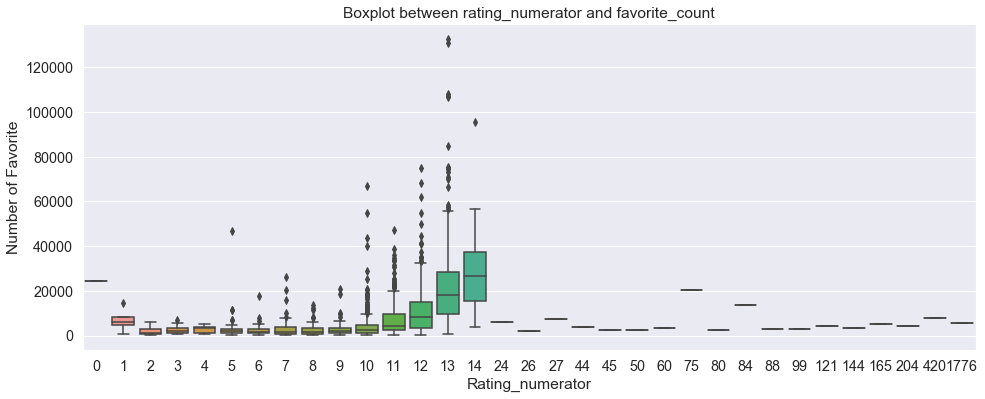

In [218]:
# Font & Graph options
sns.set(font_scale=1.3)
plt.subplots(figsize=(16, 6))

# boxplot 
sns.boxplot(x=df_total['rating_numerator'], y=df_total['favorite_count']).set(xlabel='Rating_numerator',
                                                                              ylabel='Number of Favorite',
                                                                              title='Boxplot between rating_numerator and favorite_count')

Insight
- Supposing rating_numerator values of 24~1776 are outliers, our data show that <strong>Highly</strong> rated tweets are more likely to receive 'Favorite' from the users

### Boxplot between 'rating_numerator' and 'retweet_count'

[Text(0, 0.5, 'Number of Retweet'),
 Text(0.5, 0, 'Rating_numerator'),
 Text(0.5, 1.0, 'Boxplot between rating_numerator and retweet_count')]

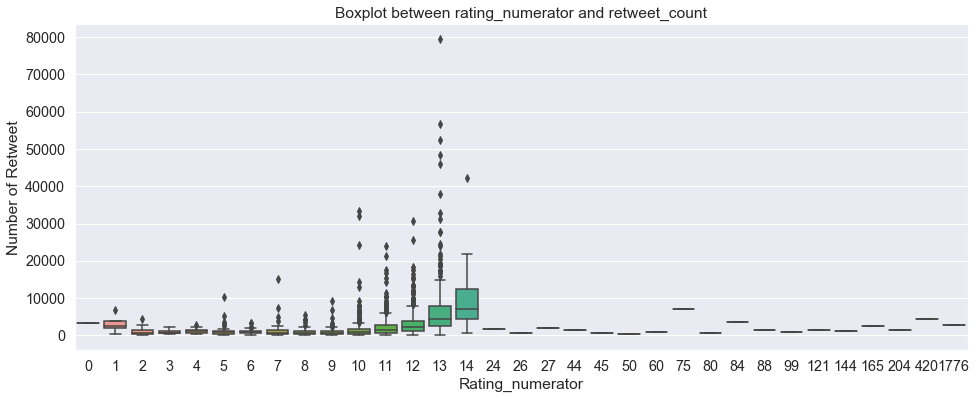

In [222]:
# Font & Graph options
plt.subplots(figsize=(16, 6))

# boxplot 
sns.boxplot(x=df_total['rating_numerator'], y=df_total['retweet_count']).set(xlabel='Rating_numerator',
                                                                              ylabel='Number of Retweet',
                                                                              title='Boxplot between rating_numerator and retweet_count')

Insight
- Similar to Boxplot between 'rating_numerator' and 'favorite_count', Number of retweet tends to increase as the rating increases

### Scatterplot between 'favorite_count'' and 'retweet_count'

Correlation Factor:  0.9112013037010287


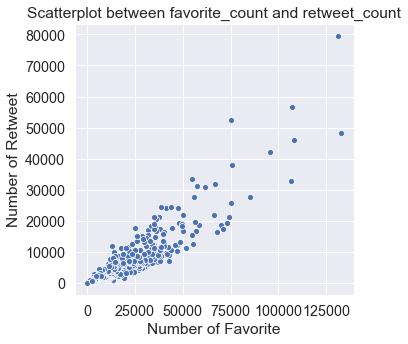

In [237]:
plt.subplots(figsize=(5, 5))
sns.scatterplot(x=df_total['favorite_count'], y=df_total['retweet_count']).set(xlabel='Number of Favorite',
                                                                              ylabel='Number of Retweet',
                                                                              title='Scatterplot between favorite_count and retweet_count')
print('Correlation Factor: ', np.corrcoef(list(df_total['favorite_count']), list(df_total['retweet_count']))[0,1])

Insights
- According to the graph and correlation factor of (0.91), which is very high, number of favorite count and retweet have Very High correlation

### Lineplot between 'stage'' and 'favorite_count'

[Text(0, 0.5, 'Number of favorite'),
 Text(0.5, 0, 'Stage'),
 Text(0.5, 1.0, 'Lineplot between stage and favorite_count')]

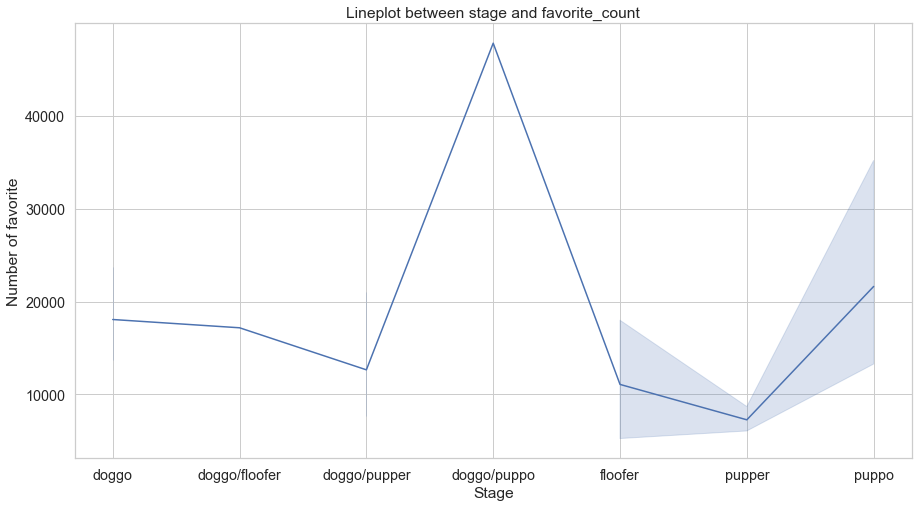

In [245]:
plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_total, x='stage', y='favorite_count').set(xlabel='Stage',
                                                               ylabel='Number of favorite',
                                                               title='Lineplot between stage and favorite_count')

Insight
- it seems people tend to like dogs in 'puppo' stages! (stage between doggo and pupper)
- People like dogs that are Not too old and young and Not too big and small

### Top 5 Names

In [250]:
df_total['name'].value_counts()[:5]

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
Name: name, dtype: int64

Insights
- It can be found that the most popular names are as follows: [Lucy, Charlie, Cooper, Oliver, Tucker]

In [257]:
df_total.head(2)

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,1,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,1,Chihuahua,0.323581


### Countplot of Timeline(hour)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Countplot of Hour')]

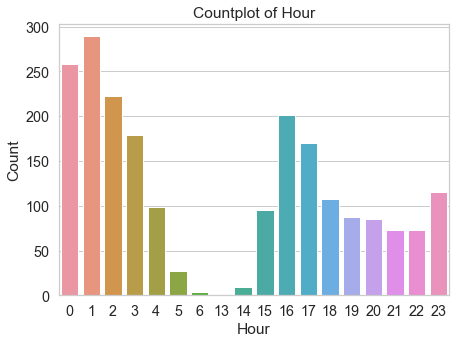

In [279]:
plt.subplots(figsize=(7, 5))
sns.countplot(data=df_total, x=df_total['timestamp'].dt.hour).set(xlabel='Hour',
                                                                  ylabel='Count',
                                                                  title='Countplot of Hour')

Insight
- it seems like WeRateDogs Account owner is very active during (00:00~02:00) period and likes to take a rest of focus on his job during (07:00 ~ 13:00) period